In [1]:
#Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Dependencies 2
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
#Dependencies 3
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
#Engine to hawaii.sqlite file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)


In [5]:
#Reflecting database
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
#Classes found 
Base.classes.keys()

['measurement', 'station']

In [7]:
#Table References
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
#Linking to DB from Python
session = Session(engine)
conn = engine.connect()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent_date

'2017-08-23'

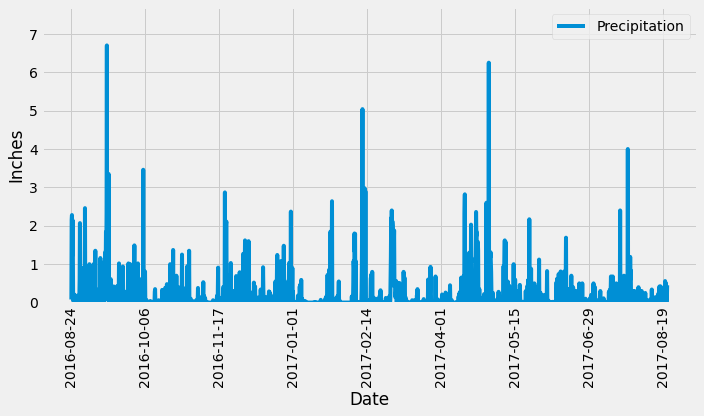

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date>=latest_date).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data, columns = ['Date','Precipitation'])
precipitation_df.set_index('Date', inplace = True)
precipitation_df = precipitation_df.dropna()

# Sort the dataframe by date
precipitation_df = pd.DataFrame.sort_index(precipitation_df)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.ylim(0,max(precipitation_df['Precipitation'])+1)
plt.savefig("../Resources/preciptation_last_12_months.png")
plt.tight_layout()
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_count = session.query(Station).\
    filter(Station.id).count()
print(total_count)

9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
print(station_count)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_desc = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(f'Station {station_count[0]} had low temperature of {temperature_desc[0][0]},\
 a high temperature of {temperature_desc[0][1]} and \
an average temperature of {temperature_desc[0][2]}.')

Station ('USC00519281', 2772) had low temperature of 54.0, a high temperature of 85.0 and an average temperature of 71.66378066378067.


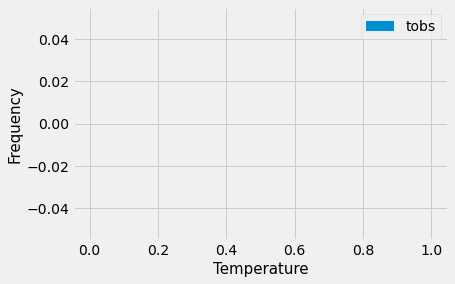

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281' ).\
    filter(Measurement.date >=most_recent_date).\
    group_by(Measurement.date).all()

temperature_df = pd.DataFrame(data=temperature_data, columns=['date','tobs'])
temperature_df = temperature_df.set_index('date',drop=True)

plt.hist(temperature_df['tobs'],12, label='tobs')
plt.grid(True)
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend(loc='best')

plt.savefig("../Resources/temperature_ative_station_past_year_hist.png")
plt.show()

# Close session

In [17]:
# Close Session
session.close()